In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import csv
from tqdm import tqdm
import time

In [3]:
path_A = 'C:/Users/kjong/Desktop/Data_set/physionet_Challenge_2019_sepsis/files/challenge-2019/1.0.0/training/training_setA/'
file_list = os.listdir(path_A)
file_lists_A = [file for file in file_list if file.endswith('.psv')]
print(f'총 환자 데이터 수 : {len(file_lists_A)}')

총 환자 데이터 수 : 20169


In [4]:
df = pd.DataFrame()
data_length_per_person = []      # 한 사람의 데이터 길이
data_length_per_person_sum = []  # 한 사람의 데이터 길이(누적)

count = 0
for i in tqdm(file_lists_A):
    data = pd.read_csv(path_A + i, sep='|')
    
    # 한 사람의 데이터 길이 계산
    data_length_per_person.append(len(data))
    
    # 한 사람의 데이터 길이(누적) 계산
    count += len(data)
    data_length_per_person_sum.append(count)
    
    df = pd.concat([df, data])
    
df = df.reset_index(drop = True)  ## reset_index 인덱스 초기화 후 재부여

20169

In [25]:
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,31,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,32,1
783923,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,33,1
783924,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,34,1


In [5]:
len(data_length_per_person)

20169

In [7]:
# 초기 DataFrame 저장
df.to_csv("00_df.csv", mode='w')

# 한 사람의 데이터 길이 저장
with open('data_length_per_person.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data_length_per_person)

# 한 사람의 데이터 길이(누적) 저장
with open('data_length_per_person_sum.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data_length_per_person_sum)

In [17]:
data_length_per_person[:10]

[54, 23, 48, 29, 48, 17, 45, 40, 258, 23]

In [24]:
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,31,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,32,1
783923,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,33,1
783924,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,34,1


In [43]:
df[df['Unit2'].notnull()]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,1,0
55,61.0,99.0,36.44,124.0,65.00,43.0,17.5,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,2,0
56,64.0,98.0,NaN,125.0,64.00,41.0,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,3,0
57,56.0,100.0,NaN,123.0,65.00,41.0,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,4,0
58,66.0,99.0,NaN,120.0,67.00,43.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783825,83.0,94.0,37.50,149.0,83.00,55.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,74.53,0,0.0,1.0,-59.09,23,0
783826,74.0,93.0,37.50,147.0,77.00,50.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,74.53,0,0.0,1.0,-59.09,24,0
783827,74.0,95.0,37.50,138.0,74.00,52.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,74.53,0,0.0,1.0,-59.09,25,0
783828,71.0,97.0,37.40,135.0,73.33,59.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,74.53,0,0.0,1.0,-59.09,26,0


<b>Vital signs (columns 1-8)</b>
- HR: Heart rate (beats per minute)
- O2Sat: Pulse oximetry (%)
- Temp: Temperature (Deg C)
- SBP: Systolic BP (mm Hg) / 수축기 혈압
- MAP: Mean arterial pressure (mm Hg) / 평균 동맥압
- DBP: Diastolic BP (mm Hg) / 이완기 혈압
- Resp: Respiration rate (breaths per minute) / 호흡수
- EtCO2: End tidal carbon dioxide (mm Hg) / 호기말이산화탄소분압 - 호흡상태를 파악

<b>Laboratory values (columns 9-34)</b>
- BaseExcess: Measure of excess bicarbonate (mmol/L) / 과잉 중탄산염 측정
- HCO3: Bicarbonate (mmol/L) / 중탄산염 - 혈액내 이산화탄소가 중탄산염 형태로 존재. 몸의 산과 염기의 균형을 유지
- FiO2: Fraction of inspired oxygen (%) 흡입산소농도 - 들숨시 들어온 기체의 산소 비율 21%가 정상
- pH: N/A / 혈액 산성도 (혈액은 기본으로 7.4 알칼리성)
- PaCO2: Partial pressure of carbon dioxide from arterial blood (mm Hg) / 동맥혈탄산가스분압 - 폐기능 지표 40+-5mmhg가 정상
- SaO2: Oygen saturation from arterial blood (%) / 동맥혈 산소포화도 97%이상 정상
- AST: Aspartate transaminase (IU/L) / 아스파르테이트아미노전달효소 - 주로 간손상 더불어 근육에 손상에 있을 때 증가.
- BUN: Blood urea nitrogen (mg/dL) / 혈액요소 질소
- Alkalinephos: Alkaline phosphatase (IU/L) / 알칼리성 인산가수분해효소 - 간이 안좋을 때 증가.
- Calcium: (mg/dL) / 칼슘
- Chloride: (mmol/L) / 염화물
- Creatinine: (mg/dL) / 크레아틴
- Bilirubin_direct: Bilirubin direct (mg/dL) 직접빌리루빈 - 헤모글로빈이 만드는 답즘의 구성성분
- Glucose: Serum glucose (mg/dL) / 포도당
- Lactate: Lactic acid (mg/dL) / 락트산(젖산) - 운동 많이하면..
- Magnesium: (mmol/dL) / 마그네슘
- Phosphate: (mg/dL) / 인산염 - 골격, ph유지, 비타민 및 효소의 활성 등에 사용 현재는 과잉에 문제가 있음(즉석식품)
- Potassium: (mmol/L) / 칼륨
- Bilirubin_total: Total bilirubin (mg/dL) / 총 빌리루빈
- TroponinI: Troponin I (ng/mL) / 트로포닌I - 골격근과 심장 근육의 근육수축에 필수적. 트로포닌I는 심장에 손상이 있을 때 증가
- Hct: Hematocrit (%) / 헤마코트릿(전체 피 중 적혈구가 차지하는 비율)
- Hgb: Hemoglobin (g/dL) / 헤모글로빈
- PTT: partial thromboplastin time (seconds) / 혈액이 응고되는 데 걸리는 시간을 측정하는 검사
- WBC: Leukocyte count (count*10^3/µL) / 백혈구 수 검사
- Fibrinogen: (mg/dL) / 피브리노겐 - 혈액응고에 관게하는 혈장 단백질 - 많으면 어딘가에서 출혈중.
- Platelets: (count*10^3/µL) / 혈소판 - 지혈과 혈액응고를 관장하는 혈구 중 하나

<b>Demographics: (columns 35-40)</b>
- Age: Years (100 for patients 90 or above)
- Gender: Female (0) or Male (1)
- Unit1: Administrative identifier for ICU unit (MICU)
- Unit2: Administrative identifier for ICU unit (SICU)
- HospAdmTime: Hours between hospital admit and ICU admit / 병원 입원 후 ICU에 간 시간.
- ICULOS: ICU length-of-stay (hours since ICU admit) / ICU 입원 시간

<b>Outcome (column 41)</b>
- SepsisLabel

## Sepsis와 논리적으로 비연관 데이터 제거 (ex. 입원 병동, 입원 기간 등)
1. Unit1: Administrative identifier for ICU unit (MICU)
2. Unit2: Administrative identifier for ICU unit (SICU)
3. HospAdmTime: Hours between hospital admit and ICU admit / 병원 입원 후 ICU에 간 시간.
4. ICULOS: ICU length-of-stay (hours since ICU admit) / ICU 입원 시간

In [34]:
pre_df = df.drop(['Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'], axis=1)
pre_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,...,NaN,27.8,NaN,NaN,NaN,NaN,NaN,62.29,1,1
783923,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1
783924,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1


- 로우 데이터 파일로 저장

In [29]:
pre_df.to_csv("01_pre_df.csv", mode='w')

# ================= 데이터 분석 및 전처리 =====================

- csv 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import csv
from tqdm import tqdm
import time

In [2]:
df = pd.read_csv('00_df.csv', index_col=0)
pre_df = pd.read_csv("01_pre_df.csv", index_col=0)

In [3]:
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,31,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,32,1
783923,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,33,1
783924,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,34,1


In [4]:
pre_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,...,NaN,27.8,NaN,NaN,NaN,NaN,NaN,62.29,1,1
783923,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1
783924,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,1


In [5]:
# import list data 
data_length_per_person = []
data_length_per_person_sum = []

with open('data_length_per_person.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person.append(int(i))
            
            
with open('data_length_per_person_sum.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person_sum.append(int(i))

# - 결측 데이터 비율 확인

In [6]:
columns = pre_df.columns
columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'SepsisLabel'],
      dtype='object')

In [7]:
null_rates = []

for column in columns:
    a = pre_df[column].isnull().sum()
    null_rates.append(round(a/pre_df.shape[0]*100, 2))
#     print(column,"/", a, "/", round(a/pre_df.shape[0]*100, 2))

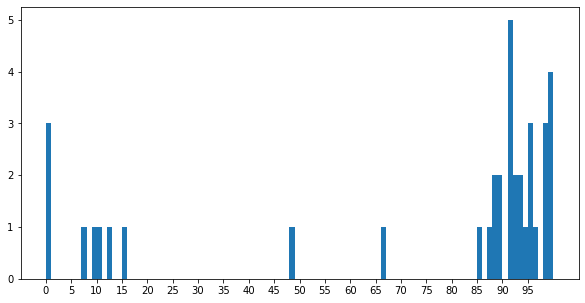

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(null_rates, bins=100)
plt.xticks(range(0, 100, 5))
plt.show()

## > 그래프가 튀어 오르는 <u>85% 이상의 결측치는 우선 제거</u>

# - 결측 비율 별 index 추출 및 전처리

In [8]:
count = 0
upper99 = []
upper90 = []
upper85 = []

for i in range(len(null_rates)):
    if null_rates[i] >= 99:
        count += 1
        upper99.append(i)
    if null_rates[i] >= 90:
        count += 1
        upper90.append(i)
    if null_rates[i] >= 85:
        count += 1
        upper85.append(i)
    
        
print(f"pre_df Columns Total: {pre_df.shape[1]} / null 85% 이상의 column: {count} / 비율: {round(count/df.shape[1]*100, 2)}")
print('결측치 99% 이상:', len(upper99), '>' ,upper99)
print('결측치 90% 이상:', len(upper90), '>' ,upper90)
print('결측치 85% 이상:', len(upper85), '>' ,upper85)

pre_df Columns Total: 37 / null 85% 이상의 column: 52 / 비율: 126.83
결측치 99% 이상: 4 > [7, 20, 27, 32]
결측치 90% 이상: 21 > [7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33]
결측치 85% 이상: 27 > [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [9]:
## 결측치 85퍼 이상 제거한 DF
pre_df = pre_df.drop(pre_df.columns[upper85], axis=1)
pre_df.shape

(783367, 10)

# 상관 관계 분석

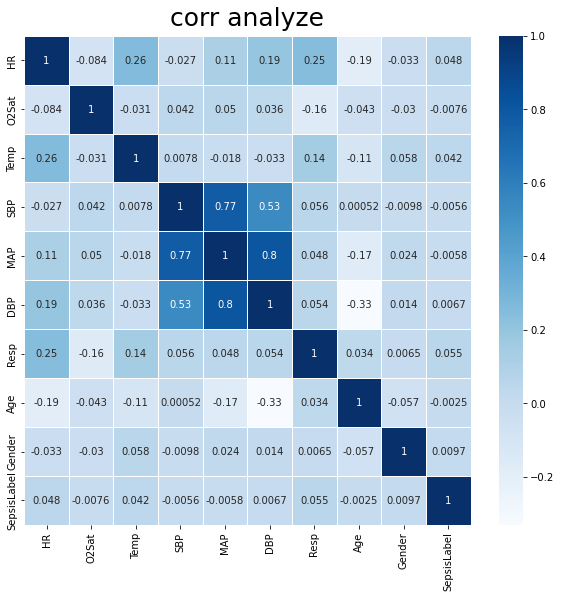

In [10]:
plt.figure(figsize=(10,9))
sns.heatmap(data=pre_df.corr(), annot=True, linewidths=.5, cmap='Blues')
plt.title('corr analyze',pad=10, fontsize=25)
plt.show()

0.5 이상의 상관관계를 가진 인자들을 분석
- SBP: Systolic BP (mm Hg) / 수축기 혈압
- MAP: Mean arterial pressure (mm Hg) / 평균 동맥압
- DBP: Diastolic BP (mm Hg) / 이완기 혈압
---
해석
- SBP - MAP : 평균동맥압이 높으면 수축기 혈압도 자연스레 증가 (논리적인 양의 상관관계)
- MAP - DBP : 평균동맥압이 높으면 이완기 혈압도 자연스레 증가 (논리적인 양의 상관관계)
- DBP - SBP : 이완기 혈압이 높으면 수축기 혈압도 비슷하게 증가 (논리적인 양의 상관관계)
- 단, 이완기 혈압과 수축기 혈압의 차이가 커지면 대사증후군 발병의 위험도가 증가 - sepsis와의 연관성은 알 수 없음.


### 논리적으로 이해가 되지 않는, **숨겨진 상관 관계**는 확인하지 못함.

# Sepsis 발병 환자 데이터 수 & 비율 확인

In [11]:
pre_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,83.14,0,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,83.14,0,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,83.14,0,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,83.14,0,0


In [12]:
i_f = 0
i_e = 1

f = 0                             # 0,  54,  77
e = data_length_per_person[i_f]   # 54, 77, 125 

sepsis = []                       # Sepsis 발병 환자 수
nonsepsis = []                    # Sepsis 발병하지 않은 환자 수

sepsis_df = []
non_sepsis_df = []
while i_e != len(data_length_per_person):
    if sum(pre_df['SepsisLabel'][f:e]) > 0:
        sepsis.append(i_f)
        sepsis_df.append(np.array(pre_df[f:e]))
    else:
        nonsepsis.append(i_f)
        non_sepsis_df.append(np.array(pre_df[f:e]))
    f += data_length_per_person[i_f]
    i_f += 1
    i_e += 1    
    e += data_length_per_person[i_f]

In [13]:
print(f'전체 환자수 대비 Sepsis 환자수 비율:{round(len(sepsis)/len(data_length_per_person), 2)} / sepsis 발병 환자 수:{len(sepsis)} / 전체 환자 수:{len(data_length_per_person)}')

전체 환자수 대비 Sepsis 환자수 비율:0.09 / sepsis 발병 환자 수:1770 / 전체 환자 수:20158


### 전체 데이터(20169)안에서 sepsis가 발병한 환자 데이터 수 1769 (0.09%)
- 모델링 진행시 가중치를 구분해 부여하던가, non_Sepsis 환자 데이터 수를 조정하여 학습해야할 것으로 예상

## sepsis_df 와 non_sepsis_df 분석 & 시각화

In [14]:
s_count = 0
for per_data in sepsis_df:
    s_count += 1

print(f'환자수 : {len(sepsis_df[0])} / 총 데이터 수 : {s_count}')

환자수 : 258 / 총 데이터 수 : 1770


In [15]:
ns_count = 0
for per_data in non_sepsis_df:
    ns_count += 1

print(f'환자수 : {len(non_sepsis_df[0])} / 총 데이터 수 : {ns_count}')

환자수 : 54 / 총 데이터 수 : 18387


In [16]:
# DataFrame 작업
data = {'name': ['Sepsis', 'Non_sepsis'],'patient_number': [len(sepsis_df[0]), len(non_sepsis_df[0])], 'total_number_of_data': [s_count, ns_count]}
graph = pd.DataFrame(data)

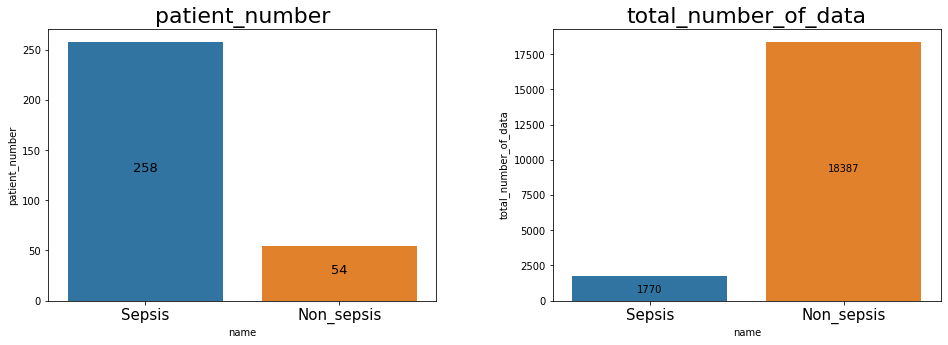

In [17]:
# 시각화 작업
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='name', y="patient_number", data=graph, ax=ax1);
ax1.set_title('patient_number', fontsize=22)
ax1.tick_params(axis='x', labelsize=15)
ax1.text(0, graph['patient_number'][0]/2, graph['patient_number'][0], ha='center',fontsize=13)
ax1.text(1, graph['patient_number'][1]/2, graph['patient_number'][1], ha='center',fontsize=13)

# plt.subplot(212)
sns.barplot(x='name', y="total_number_of_data", data=graph, ax=ax2);
ax2.set_title('total_number_of_data', fontsize=22)
ax2.tick_params(axis='x', labelsize=15)
ax2.text(0, graph['total_number_of_data'][0]/2-300, graph['total_number_of_data'][0], ha='center',fontsize=10)
ax2.text(1, graph['total_number_of_data'][1]/2, graph['total_number_of_data'][1], ha='center',fontsize=10)

plt.subplots_adjust(wspace=0.3)
plt.show()

- sepsis환자 수는 non_sepsis환자수보다 약 4배가 많지만, 수집된 데이터의 양은 non_sepsis 환자 데이터가 110% 더 많다.

# 연령별 Sepsis 발병 비율

In [18]:
# Sepsis 발병 환자 연령대 LIST
age_list_sepsis = [sepsis_df[i][0][7] for i in range(len(sepsis_df[0]))]

# Sepsis 미 발병 환자 연령대 LIST
age_list_non_sepsis = [non_sepsis_df[i][0][7] for i in range(len(non_sepsis_df[0]))]

age_list_non_sepsis[:10]

[83.14, 75.91, 45.82, 65.71, 28.09, 52.01, 64.24, 87.08, 76.71, 81.64]

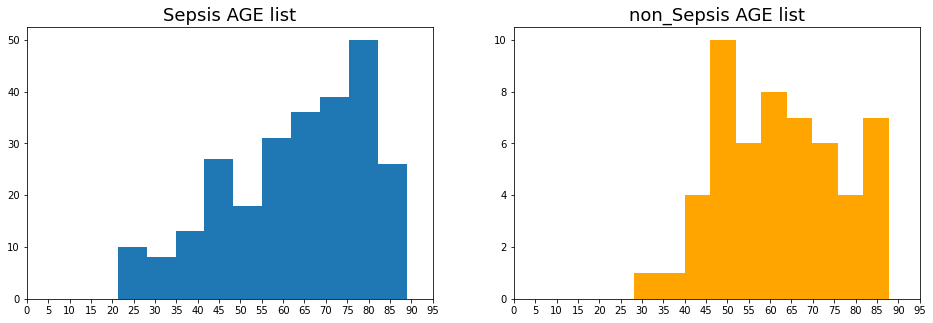

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.hist(age_list_sepsis)
xticks = [i for i in range(0, 100, 5)]
ax1.set_xticks(xticks)
ax1.tick_params(axis='x', which='minor')
ax1.set_title('Sepsis AGE list', fontsize='18')

ax2.hist(age_list_non_sepsis, color='orange')
xticks = [i for i in range(0, 100, 5)]
ax2.set_xticks(xticks)
ax2.tick_params(axis='x', which='minor')
ax2.set_title('non_Sepsis AGE list', fontsize='18')

plt.show()

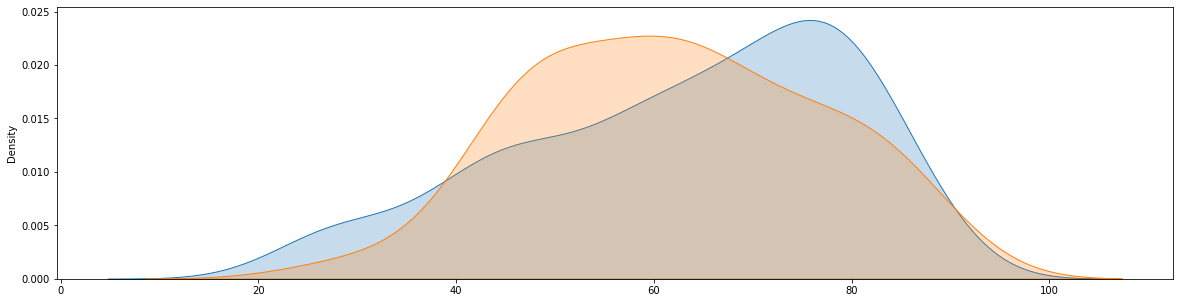

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax = sns.kdeplot(age_list_sepsis, shade=True)
ax = sns.kdeplot(age_list_non_sepsis, shade=True)

### Sepsis환자는 주로 [60:80]대의 연령대를 보이고 있고 / non_sepsis환자는 [40:60]대의 연령대가 많이 있다

In [34]:
pre_df[0:54]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel
0,97.00,95.000000,36.1100,98.00,75.330,NaN,19.00,83.14,0,0
1,97.00,95.000000,36.1100,98.00,75.330,NaN,19.00,83.14,0,0
2,89.00,99.000000,36.1100,122.00,86.000,NaN,22.00,83.14,0,0
3,90.00,95.000000,36.1100,122.00,88.665,NaN,30.00,83.14,0,0
4,103.00,88.500000,36.1100,122.00,91.330,NaN,24.50,83.14,0,0
5,110.00,91.000000,36.1100,122.50,84.165,NaN,22.00,83.14,0,0
6,108.00,92.000000,36.1100,123.00,77.000,NaN,29.00,83.14,0,0
7,106.00,90.500000,36.3750,93.00,76.330,NaN,29.00,83.14,0,0
8,104.00,95.000000,36.6400,133.00,88.330,NaN,26.00,83.14,0,0
9,102.00,91.000000,36.9050,134.00,87.330,NaN,30.00,83.14,0,0


In [39]:
prossing = pre_df[0:54]

In [40]:
prossing = prossing.interpolate(method="linear", limit_direction='both')
prossing.shape
#['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender', 'SepsisLabel'],

(54, 10)

In [43]:
prossing

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel
0,97.00,95.000000,36.1100,98.00,75.330,NaN,19.00,83.14,0,0
1,97.00,95.000000,36.1100,98.00,75.330,NaN,19.00,83.14,0,0
2,89.00,99.000000,36.1100,122.00,86.000,NaN,22.00,83.14,0,0
3,90.00,95.000000,36.1100,122.00,88.665,NaN,30.00,83.14,0,0
4,103.00,88.500000,36.1100,122.00,91.330,NaN,24.50,83.14,0,0
5,110.00,91.000000,36.1100,122.50,84.165,NaN,22.00,83.14,0,0
6,108.00,92.000000,36.1100,123.00,77.000,NaN,29.00,83.14,0,0
7,106.00,90.500000,36.3750,93.00,76.330,NaN,29.00,83.14,0,0
8,104.00,95.000000,36.6400,133.00,88.330,NaN,26.00,83.14,0,0
9,102.00,91.000000,36.9050,134.00,87.330,NaN,30.00,83.14,0,0


In [42]:
prossing.isnull().sum()

HR              0
O2Sat           0
Temp            0
SBP             0
MAP             0
DBP            54
Resp            0
Age             0
Gender          0
SepsisLabel     0
dtype: int64

ex) 1~100까지 시퀀스가 이어지는 데이터가 있다고 가정했을 때
- 예상 1. 처음과 끝에는 데이터가 있고, 중간에 결측치가 있는 경우  >   [10, 20, 30, null, null, null, ..., 80, 90, 100]
- 예상 2. 처음에는 데이터가 있고, 중간부터 끝까지 결측치가 있는 경우  >  [10, 20, 30, null, null, ..., null, null, null]
- 예상 3. 처음에는 결측이 있으나, 중간부터 끝까지는 데이터가 있는 경우  >  [null, null, null, ..., 70, 80, 90, 100]
- 예상 4. 처음과 끝에는 결측이 있고, 중간 데이터만 있는 경우  >  [null. null. ..., 50, 60, 70, null, null, null]